In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('amazon.csv', encoding='iso-8859-1', parse_dates=['date'])

In [3]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [4]:
# 1. Display top 5 rows of dataset 
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [5]:
# 2. Check last 5 roes of dataset 
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [6]:
# 3. Find shape of the data 
print("Shape:", data.shape)
print("Columns:", data.shape[1])
print("Rows:", data.shape[0])

Shape: (6454, 5)
Columns: 5
Rows: 6454


In [7]:
# 4. Get additional information about the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [8]:
# 5. Check for duplicate data and drop them 
data.duplicated().any()

True

In [9]:
print("Total duplicate values:", data.duplicated().sum())

Total duplicate values: 32


In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(6422, 5)

In [12]:
# 6. Check null values in the data 
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [13]:
# 7. Get overall statistics about the dataframe 
data.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


In [14]:
# 8. Rename month names to english
data.head(3)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01


In [15]:
data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [16]:
data['month'] = data['month'].map({'Janeiro':'January', 'Fevereiro':'February', 'Março':'March', 'Abril':'April', 
                                   'Maio':'May', 'Junho':'June','Julho':'July', 'Agosto':'August', 'Setembro':'September', 
                                   'Outubro':'October', 'Novembro':'November', 'Dezembro':'December'})

In [17]:
data.head(3)

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01


In [18]:
# 9. Total number of fires registered 
print("Total number of fires registered:", data.shape[0])

Total number of fires registered: 6422


In [19]:
# 10. In which month maximum number of forest fires were registered 
df = data.groupby('month')['number'].sum().reset_index()
df

,month,number
0,April,28184.770
1,August,88050.435
2,December,57535.480
3,February,30839.050
4,January,47681.844
5,July,92319.113
6,June,55997.675
7,March,30709.405
8,May,34725.363
9,November,85508.054


<Axes: xlabel='month', ylabel='number'>

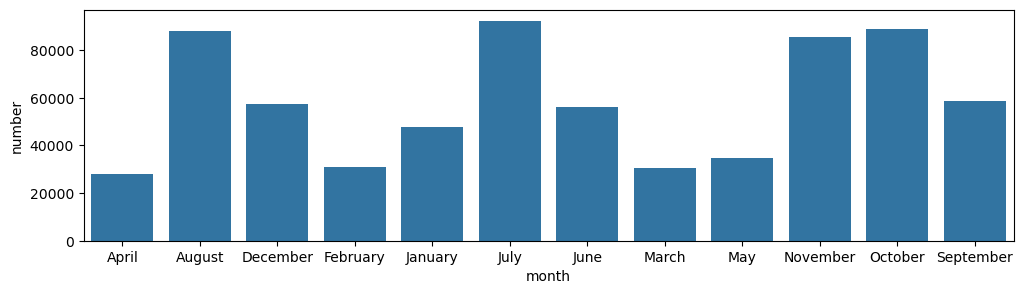

In [20]:
plt.figure(figsize=(12,3))
sns.barplot(x='month', y='number', data=df)

In [21]:
# 11. In which year were the maximum number of forest fires reported 
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [22]:
data.groupby('year')['number'].sum().sort_values(ascending=False).head(1)

year
2003    42760.674
Name: number, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_14328\3982992558.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='year', y='number', data=data, ci=False, hue='year', palette='turbo')


<Axes: xlabel='Year', ylabel='Number'>

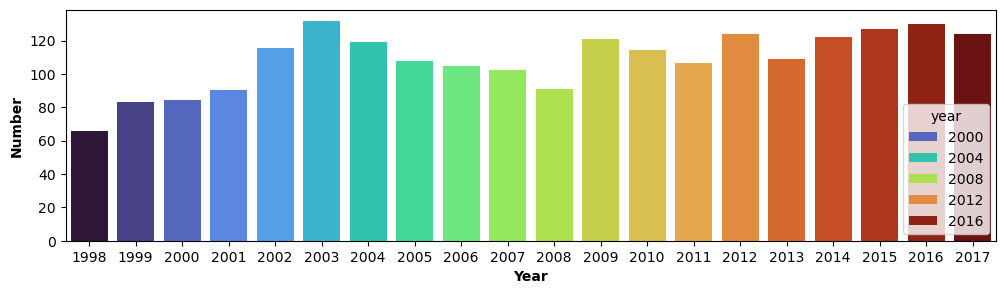

In [23]:
plt.figure(figsize=(12,3))
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number', fontweight='bold')
sns.barplot(x='year', y='number', data=data, ci=False, hue='year', palette='turbo')

In [24]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [25]:
# 12. In which state maximum number of forest fires were reported 
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [26]:
df1 = data.groupby('state')['number'].sum().reset_index()
df1

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


<Axes: xlabel='number', ylabel='state'>

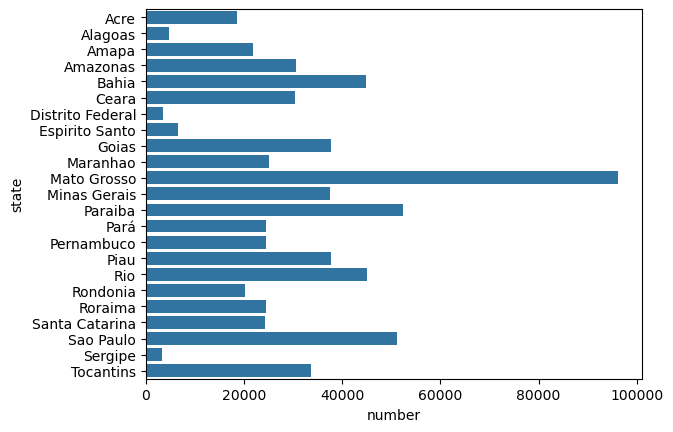

In [27]:
sns.barplot(y='state', x='number', data=df1)


In [28]:
# 13. Find total number of fires reported in Amazonas 
total = data[data['state'] == 'Amazonas']['number'].sum()
print("Total fires reported in Amazonas:", total)

Total fires reported in Amazonas: 30650.129


In [29]:
# 14. Display number of fires reported in Amazonas (Year-wise)
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [30]:
amazona = data[data['state'] == 'Amazonas']
amazona.groupby('year')['number'].sum().reset_index()

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


C:\Users\HP\AppData\Local\Temp\ipykernel_14328\4172184870.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='year', y='number', data=amazona, ci=False)


<Axes: xlabel='Year', ylabel='Arizona Fire Count'>

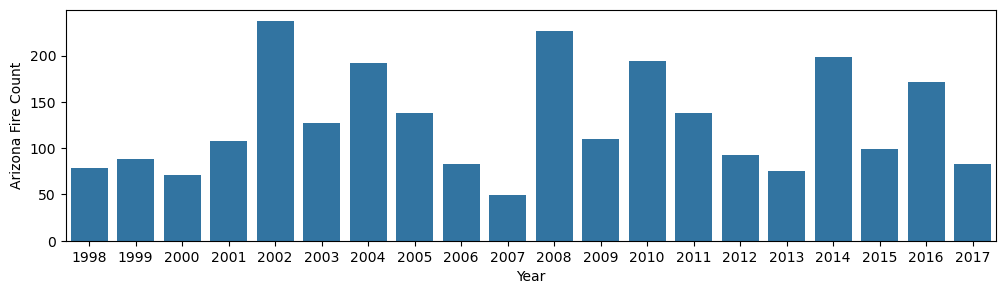

In [31]:
plt.figure(figsize=(12,3))
plt.xlabel("Year")
plt.ylabel("Arizona Fire Count")
sns.barplot(x='year', y='number', data=amazona, ci=False)

In [32]:
# 15. Display number of fires reported in amazonas (Day wise) 
df2 = data[data['state'] == 'Amazonas']

In [33]:
day = df2.groupby(df2['date'].dt.dayofweek).sum(numeric_only=True).number
import calendar

day.index = [calendar.day_name[x] for x in range(7)]
day = day.reset_index()
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<Axes: xlabel='index', ylabel='number'>

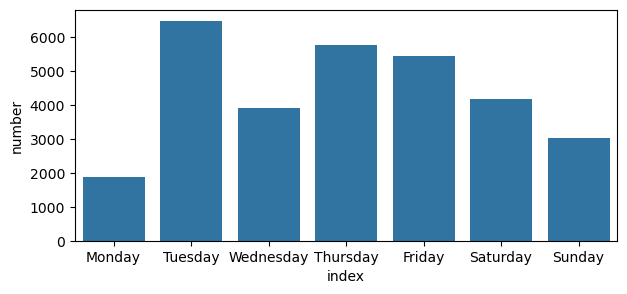

In [34]:
plt.figure(figsize=(7,3))
sns.barplot(x='index', y='number', data=day)

In [37]:
# 16. Find total number of fires reported in 2015 and visulaize the data based on each Month 
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [42]:
fire = data[data['year'] == 2015].groupby('month')['number'].sum()
fire

month
April        2573.000
August       4363.125
December     4088.522
February     2309.000
January      4635.000
July         4364.392
June         3260.552
March        2202.000
May          2384.000
November     4034.518
October      4499.525
September    2494.658
Name: number, dtype: float64

<Axes: xlabel='month', ylabel='number'>

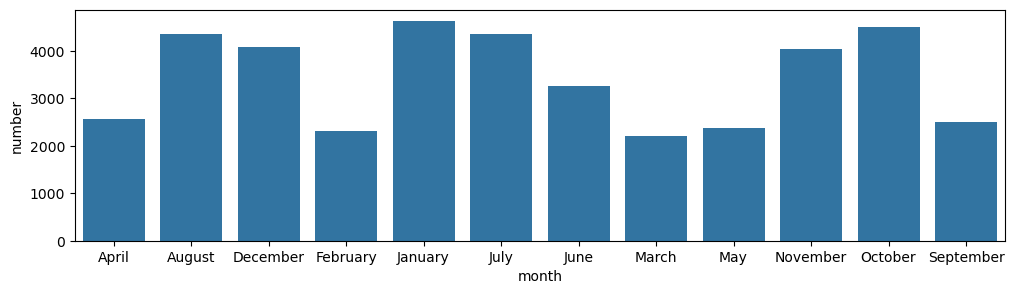

In [46]:
plt.figure(figsize=(12,3))
sns.barplot(data=fire)

In [47]:
# 17. Find average number of fires reported from highest to lowest (state-wise)
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [50]:
data.groupby('state')['number'].mean().sort_values(ascending=False)

state
Sao Paulo           213.896226
Mato Grosso         203.479975
Bahia               187.222703
Piau                158.174674
Goias               157.721841
Minas Gerais        156.800243
Tocantins           141.037176
Amazonas            128.243218
Ceara               127.314071
Paraiba             111.073979
Maranhao            105.142808
Pará                102.561272
Pernambuco          102.502092
Roraima             102.029598
Santa Catarina      101.924067
Amapa                91.345506
Rondonia             84.876272
Acre                 77.255356
Rio                  64.698515
Espirito Santo       27.389121
Alagoas              19.271967
Distrito Federal     14.899582
Sergipe              13.543933
Name: number, dtype: float64

In [51]:
# 18. Find the state names where fires were reported in 'dec' month 
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [56]:
data[data['month'] == 'December']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)